<a href="https://colab.research.google.com/github/h-razu/air-quality-analysis/blob/main/air_quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the Required Library

In [66]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Mount Google Drive and Load the Datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/datasets/assessment_datasets'

/content/drive/MyDrive/datasets/assessment_datasets


In [67]:
%ls

air_quality_data_combined.csv
combined_output.csv
PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [68]:
# Get all files in the folder
files = os.listdir()

# Filter only CSV files that start with "PRSA_Data_"
csv_files = [file for file in files if file.startswith("PRSA_Data_") and file.endswith(".csv")]

# Choose 4 random CSV files
random_csv_files = random.sample(csv_files, 4)
selected_stations = [csv_file.split('_')[2] for csv_file in random_csv_files]

# Read and combine random selected CSV files
combined_df = pd.concat([pd.read_csv(file) for file in random_csv_files], ignore_index=True)

# Save to a new CSV file
combined_df.to_csv("air_quality_data_combined.csv", index=False)

print(f"CSV files containing {selected_stations} station have been merged into 'air_quality_data_combined.csv'.")

CSV files containing ['Changping', 'Aotizhongxin', 'Wanliu', 'Shunyi'] station have been merged into 'air_quality_data_combined.csv'.


In [69]:
df = pd.read_csv("air_quality_data_combined.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


## Assessing DataFrame

In [70]:
#df shape
print(f"DataFrame shape is: {df.shape}")

DataFrame shape is: (140256, 18)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       140256 non-null  int64  
 1   year     140256 non-null  int64  
 2   month    140256 non-null  int64  
 3   day      140256 non-null  int64  
 4   hour     140256 non-null  int64  
 5   PM2.5    137262 non-null  float64
 6   PM10     138124 non-null  float64
 7   SO2      136822 non-null  float64
 8   NO2      136131 non-null  float64
 9   CO       132969 non-null  float64
 10  O3       134337 non-null  float64
 11  TEMP     140112 non-null  float64
 12  PRES     140115 non-null  float64
 13  DEWP     140109 non-null  float64
 14  RAIN     140114 non-null  float64
 15  wd       139429 non-null  object 
 16  WSPM     140141 non-null  float64
 17  station  140256 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 19.3+ MB


In [72]:
#print data types
df_types = pd.DataFrame([df.dtypes], columns=df.columns)
df_types

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object


In [73]:
# check duplicate value
df.duplicated().sum()

np.int64(0)

In [74]:
df['station'].value_counts()

,count
station,
Changping,35064
Aotizhongxin,35064
Wanliu,35064
Shunyi,35064


## Data Cleaning

#### Merge `year`, `month`, `day`, `hour` into `timestamp`. Convert it into datetime and set as index.

Converting the `year`, `month`, `day`, and `hour` into a datetime `timestamp` and using it as the index simplifies the data structure and enhances analysis. It allows for efficient time-based operations like filtering, resampling, and time series analysis. Storing the data as datetime reduces memory usage and ensures consistency, making it easier to work with time-related calculations. Using it as the index also helps in sorting and accessing data by specific time intervals, improving the overall efficiency of time-based analyses and visualizations.

In [75]:
# Create `timestamp` column
df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Set `timestamp` as the index
df = df.set_index('timestamp')

# Drop `No`
df = df.drop(['No'], axis=1)

df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
timestamp,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 01:00:00,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2013-03-01 02:00:00,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
2013-03-01 03:00:00,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


#### Inspect missing value and count

In [76]:
missing_values = pd.DataFrame([df.isna().sum(), ((df.isna().sum() / len(df))*100).round(3)], columns=df.columns)
missing_values.index = ['Count', 'Percentage']
missing_values

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
Count,0.0,0.0,0.0,0.0,2994.000,2132.00,3434.000,4125.000,7287.000,5919.00,144.000,141.000,147.000,142.000,827.00,115.000,0.0
Percentage,0.0,0.0,0.0,0.0,2.135,1.52,2.448,2.941,5.195,4.22,0.103,0.101,0.105,0.101,0.59,0.082,0.0


Since the percentage of missing values (most of the case for 4 csv file) in the dataset is `around 5%`, dropping rows with missing data is a reasonable approach. The small proportion of missing values means that removing these rows will not significantly impact the overall dataset, and it helps maintain the integrity of the data by avoiding potential biases introduced by imputation. This ensures that the analysis remains accurate and can work with clean, complete data without introducing assumptions or uncertainty.

In [77]:
# Drop missing rows
print(f'Shape before dropping missing values: {df.shape}')
df = df.dropna(axis=0)
print(f'Shape after dropping missing values: {df.shape}')

Shape before dropping missing values: (140256, 17)
Shape after dropping missing values: (125324, 17)


In [78]:
# Inspect missing values again
missing_values = pd.DataFrame([df.isna().sum(), ((df.isna().sum() / len(df))*100).round(3)], columns=df.columns)
missing_values.index = ['Count', 'Percentage']
missing_values

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
Count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Outliers Handling

In [17]:
# statistical Information about data
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,130346.000000,130346.000000,130346.000000,130346.000000,130346.000000,130346.000000,130346.000000,130346.000000,130346.000000,130346.000000,130346.000000,130346.000000,130346.000000,130346.000000,130346.000000
mean,2014.693907,6.510695,15.662153,11.552721,76.848152,100.448293,15.040652,47.247338,1204.136782,57.749881,13.261400,1010.254211,2.056390,0.065023,1.809202
std,1.170106,3.462843,8.789866,6.941853,77.512420,87.922818,21.214506,32.830471,1120.739886,56.499242,11.508847,10.416357,13.899262,0.807275,1.263283
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-19.900000,982.400000,-35.300000,0.000000,0.000000
25%,2014.000000,3.000000,8.000000,6.000000,20.000000,35.000000,2.000000,22.000000,500.000000,12.000000,3.000000,1001.800000,-9.500000,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,12.000000,53.000000,78.000000,7.000000,40.000000,900.000000,45.000000,14.100000,1010.000000,2.400000,0.000000,1.500000
75%,2016.000000,10.000000,23.000000,18.000000,107.000000,139.000000,18.000000,66.000000,1500.000000,81.000000,23.100000,1018.400000,14.800000,0.000000,2.300000
max,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,315.000000,273.000000,10000.000000,674.000000,41.400000,1042.000000,29.100000,52.100000,12.900000


ValueError: num must be an integer with 1 <= num <= 12, not 13

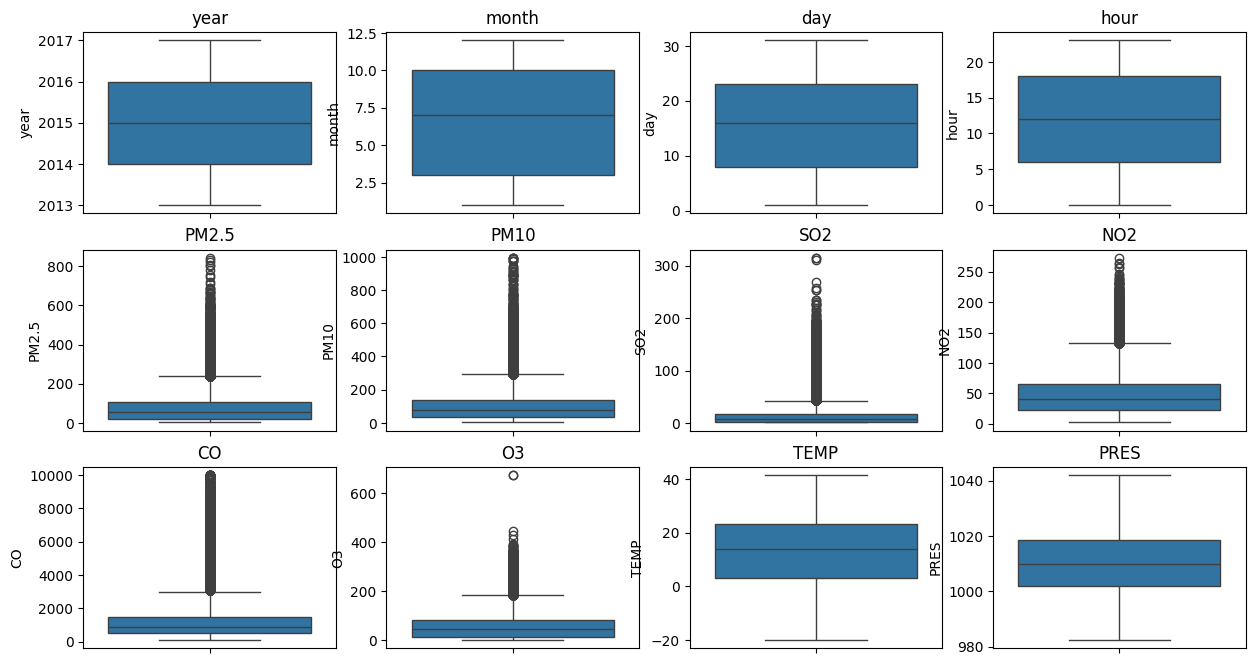

In [18]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns.to_list()

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

| Column          | Observation                                                                                      |
|------------------|--------------------------------------------------------------------------------------------------|
| **PM2.5**        | Many extreme outliers above 200 µg/m³, but still plausible in highly polluted areas.            |
| **PM10**         | Similar to PM2.5, lots of upper outliers; real-world events (e.g., dust storms) can explain these. |
| **SO2**          | Several upper outliers; SO₂ spikes can occur near industrial zones.                              |
| **NO2**          | Noticeable number of upper outliers; again possibly from traffic/urban activity.                |
| **CO**           | Very large outliers reaching 10,000; likely sensor error. |
| **O3**           | Some high outliers; ozone levels can peak midday but values seem extreme.                       |
| **TEMP, PRES, DEWP** | Distributions are clean with minimal or no outliers—no need for removal.                      |
| **RAIN**         | Some spikes—likely rare but valid rainfall events. Could be left in.                            |
| **WSPM**         | Wind speed has a few outliers but they appear within a reasonable range.                        |

In [ ]:
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Apply capping to selected columns
df_capped = cap_outliers_iqr(df.copy(), df.select_dtypes(include=['number']).columns.to_list())

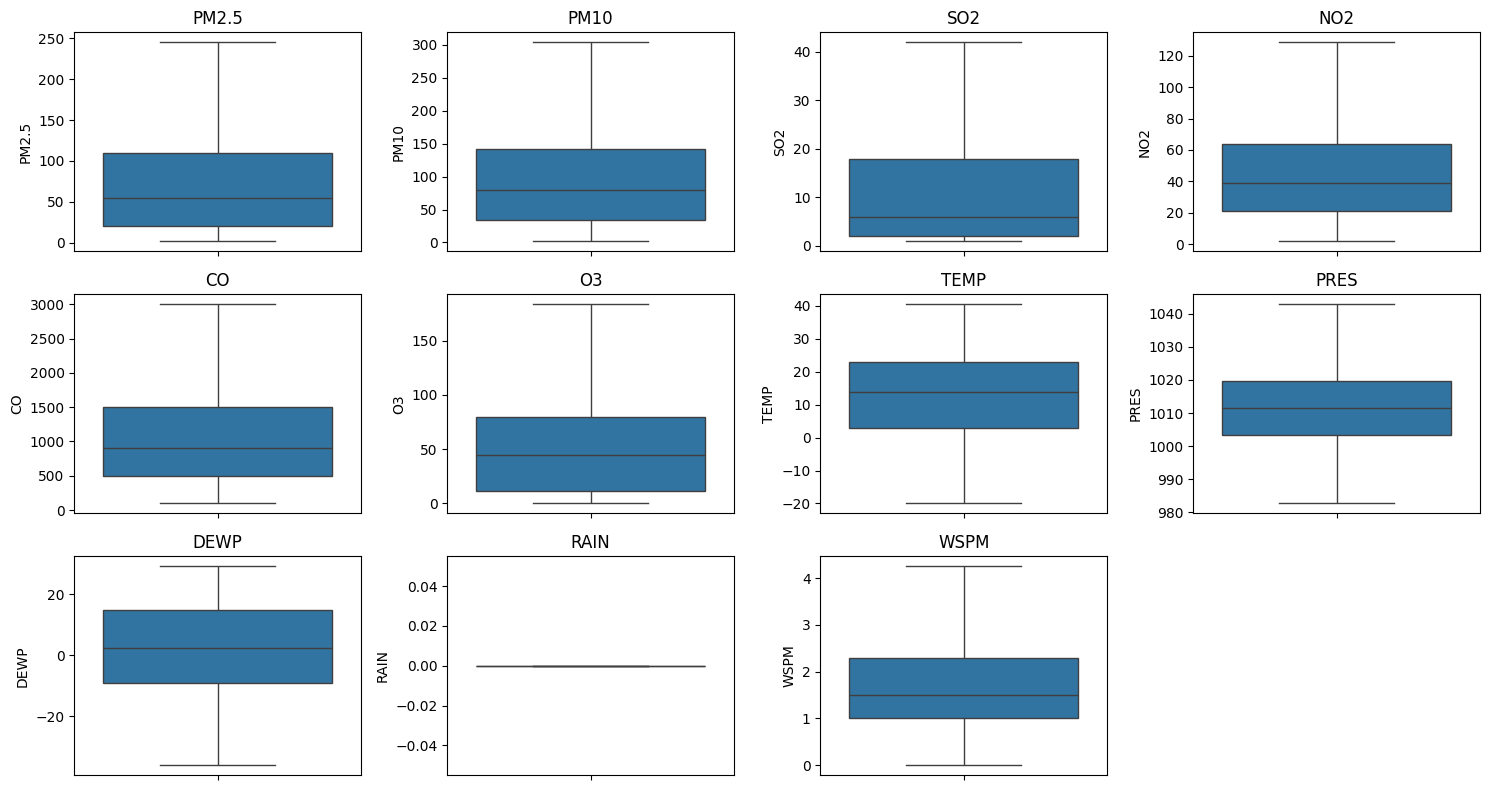

In [ ]:
numeric_cols = df_capped.select_dtypes(include=['number']).columns.to_list()

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_capped[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Feature Extraction

#### Calculate AQI (air quality index)

The Air Quality Index (AQI) is calculated by measuring the concentration of pollutants like ozone, particulate matter, sulfur dioxide, nitrogen dioxide, and carbon monoxide, then determining the highest sub-index value among these pollutants, which becomes the overall AQI.
[AQI on Wikipedia](https://en.wikipedia.org/wiki/Air_quality_index)

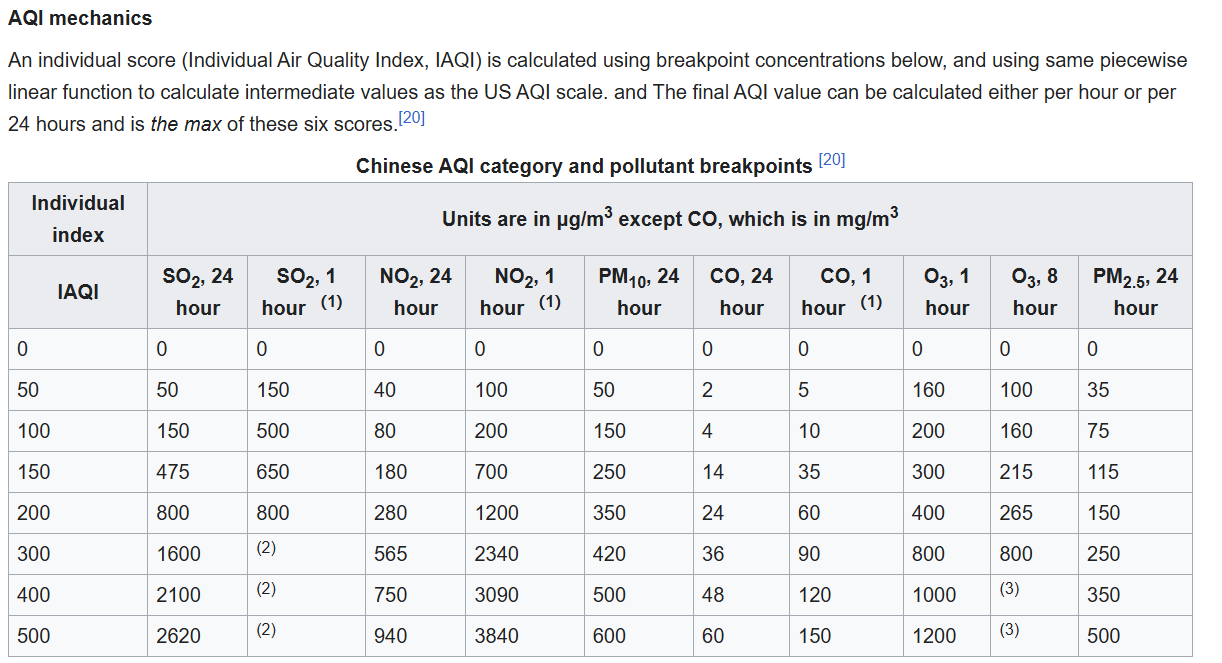

In [79]:
breakpoints_pm25_per_day = [(0, 35, 0, 50), (35, 75, 51, 100), (75, 115, 101, 150), (115, 150, 151, 200),
                    (150, 250, 201, 300), (250, 350, 301, 400), (350, 500, 401, 500)]

breakpoints_pm10_per_day = [(0, 50, 0, 50), (51, 150, 51, 100), (151, 250, 101, 150), (251, 350, 151, 200),
                    (350, 420, 201, 300), (420, 500, 301, 400), (500, 600, 401, 500)]

breakpoints_so2_per_hour = [(0, 150, 0, 50), (151, 500, 51, 100), (501, 650, 101, 150), (651, 800, 151, 200),
                   (801, 1600, 201, 300), (1601, 2100, 301, 400), (2100, 2620, 401, 500)]

breakpoints_no2_per_hour = [(0, 100, 0, 50), (101, 200, 51, 100), (201, 700, 101, 150), (701, 1200, 151, 200),
                   (1201, 2340, 201, 300), (2341, 3090, 301, 400), (3091, 3840, 401, 500)]

breakpoints_co_per_hour = [(0, 5000, 0, 50), (5001, 10000, 51, 100), (10001, 35000, 101, 150), (35001, 60000, 151, 200),
                  (60001, 90000, 201, 300), (90001, 120000, 301, 400), (120001, 150000, 401, 500)]

breakpoints_o3_per_hour = [(0, 160, 0, 50), (161, 200, 51, 100), (201, 300, 101, 150), (301, 400, 151, 200),
                  (401, 800, 201, 300), (801, 1000, 301, 400), (1001, 1200, 401, 500)]

The Air Quality Index (AQI) is calculated using a formula that converts measured pollutant concentrations into a single index value, with the highest sub-index value determining the overall AQI.



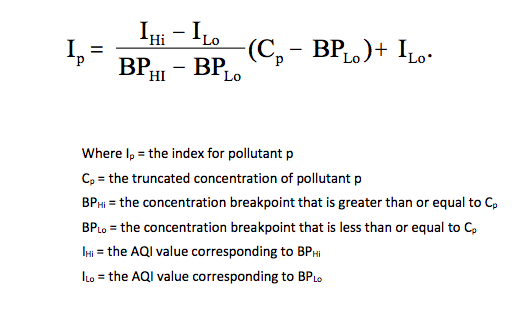

In [81]:
def calculate_aqi(conc, breakpoints):
    for C_low, C_high, I_low, I_high in breakpoints:
        if C_low <= conc <= C_high:
            return ((I_high - I_low) / (C_high - C_low)) * (conc - C_low) + I_low
    return np.nan

# 24-hour averages for PM2.5 and PM10
df['PM2.5_24h'] = df['PM2.5'].rolling(window=24, min_periods=1).mean()
df['PM10_24h'] = df['PM10'].rolling(window=24, min_periods=1).mean()

# AQI per pollutant
df['AQI_PM25'] = df['PM2.5_24h'].apply(lambda x: calculate_aqi(x, breakpoints_pm25_per_day))
df['AQI_PM10'] = df['PM10_24h'].apply(lambda x: calculate_aqi(x, breakpoints_pm10_per_day))
df['AQI_SO2'] = df['SO2'].apply(lambda x: calculate_aqi(x, breakpoints_so2_per_hour))
df['AQI_NO2'] = df['NO2'].apply(lambda x: calculate_aqi(x, breakpoints_no2_per_hour))
df['AQI_CO'] = df['CO'].apply(lambda x: calculate_aqi(x, breakpoints_co_per_hour))
df['AQI_O3'] = df['O3'].apply(lambda x: calculate_aqi(x, breakpoints_o3_per_hour))

# Final AQI: max value among all pollutants
df['AQI'] = df[['AQI_PM25', 'AQI_PM10', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3']].max(axis=1).round()

df[['AQI_PM25', 'AQI_PM10', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3', 'AQI']].head()

,AQI_PM25,AQI_PM10,AQI_SO2,AQI_NO2,AQI_CO,AQI_O3,AQI
timestamp,,,,,,,
2013-03-01 00:00:00,4.285714,6.0,4.333333,3.5,3.0,26.5625,27.0
2013-03-01 01:00:00,4.285714,4.5,2.000000,3.0,3.0,26.5625,27.0
2013-03-01 02:00:00,4.285714,4.0,7.333333,6.5,4.0,23.1250,23.0
2013-03-01 03:00:00,4.285714,4.5,4.000000,4.0,3.0,25.3125,25.0
2013-03-01 04:00:00,4.285714,4.2,4.666667,4.0,3.0,25.3125,25.0


In [82]:
# Keeping only `AQI` column, droping other column related to calculating AQI
df.drop(['PM2.5_24h', 'PM10_24h', 'AQI_PM25', 'AQI_PM10', 'AQI_SO2', 'AQI_NO2', 'AQI_CO', 'AQI_O3'], axis=1, inplace=True)

df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI
timestamp,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,27.0
2013-03-01 01:00:00,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,27.0
2013-03-01 02:00:00,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,23.0
2013-03-01 03:00:00,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,25.0
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,25.0


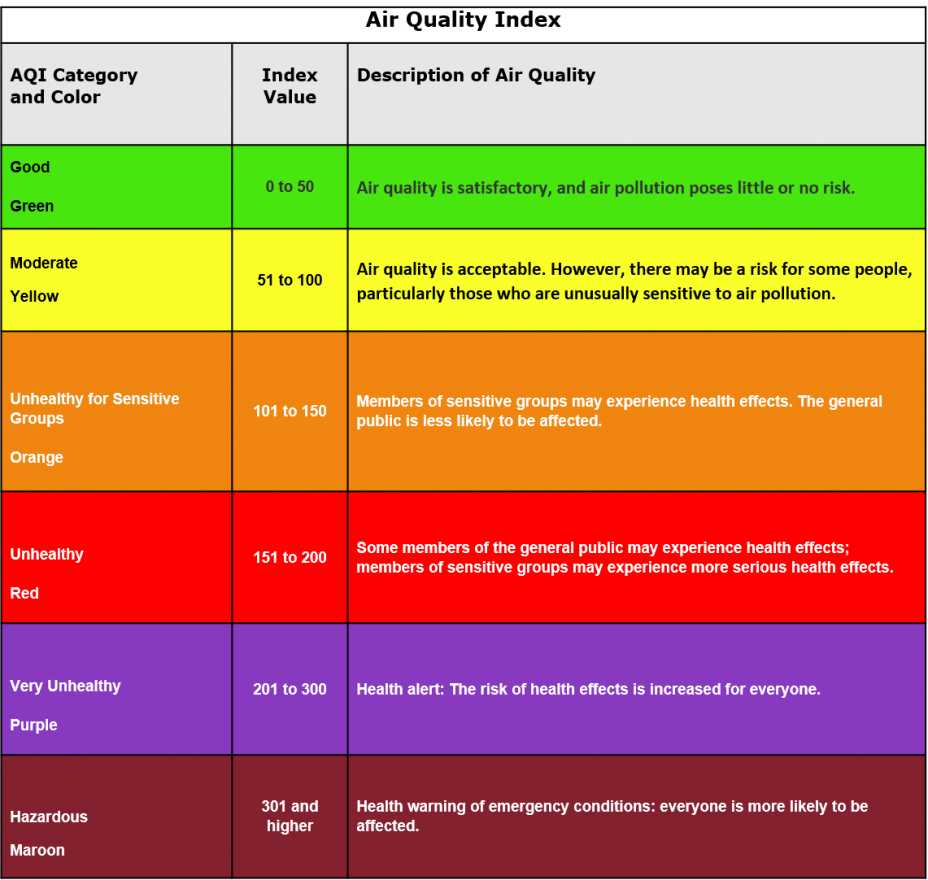

In [83]:
# create `AQI_lavel` column
bins = [0, 50, 100, 150, 200, 300, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy for sensitive group', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

df['AQI_category'] = pd.cut(df['AQI'], bins=bins, labels=labels, right=False)

df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI,AQI_category
timestamp,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,27.0,Good
2013-03-01 01:00:00,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,27.0,Good
2013-03-01 02:00:00,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,23.0,Good
2013-03-01 03:00:00,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,25.0,Good
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,25.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi,46.0,Good
2017-02-28 20:00:00,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi,43.0,Good
2017-02-28 21:00:00,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi,38.0,Good


#### Calculate `vehicle_pollution` and `industrial_pollution`

Summing specific pollutants to create `vehicle_pollution` and `industrial_pollution` variables is a practical approach to quantify pollution from these sources. `Vehicle_pollution` combines `PM2.5`, `PM10`, `NO2`, and `CO`, while `industrial_pollution` sums `SO2` and `O3`. This aggregation simplifies complex data, aiding in the analysis of trends and the development of targeted policies. However, the method assumes equal contribution from each pollutant within a category and requires consistent units.

In [84]:
df['vehicle_pollution'] = df[['PM2.5', 'PM10', 'NO2', 'CO']].sum(axis=1)
df['industrial_pollution'] = df[['SO2', 'O3']].sum(axis=1)

df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,...,PRES,DEWP,RAIN,wd,WSPM,station,AQI,AQI_category,vehicle_pollution,industrial_pollution
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,...,1020.8,-19.7,0.0,E,0.5,Changping,27.0,Good,316.0,98.0
2013-03-01 01:00:00,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,...,1021.3,-19.0,0.0,ENE,0.7,Changping,27.0,Good,312.0,91.0
2013-03-01 02:00:00,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,...,1021.3,-19.9,0.0,ENE,0.2,Changping,23.0,Good,419.0,96.0
2013-03-01 03:00:00,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,...,1021.8,-19.1,0.0,NNE,1.0,Changping,25.0,Good,317.0,93.0
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,...,1022.3,-19.4,0.0,N,2.1,Changping,25.0,Good,314.0,95.0


## Exploratory Data Analysis

#### Average AQI per Year

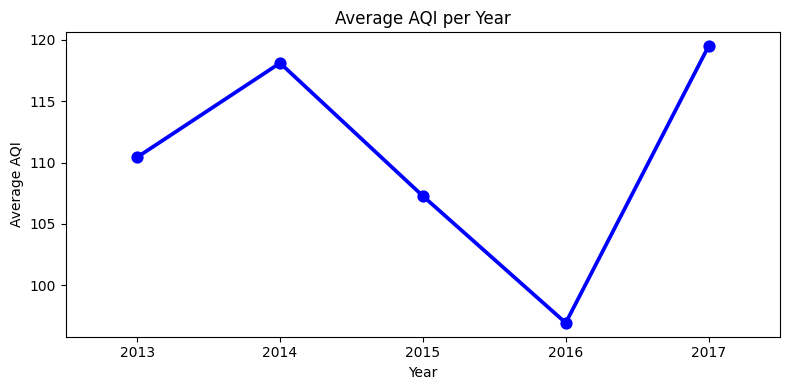

In [85]:
# Group by year and calculate mean AQI
yearly_avg = df.groupby('year')['AQI'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.pointplot(x='year', y='AQI', data=yearly_avg, color='blue', markers='o', linestyles='-')
plt.title('Average AQI per Year')
plt.ylabel('Average AQI')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

#### Average AQI per Year for each Station

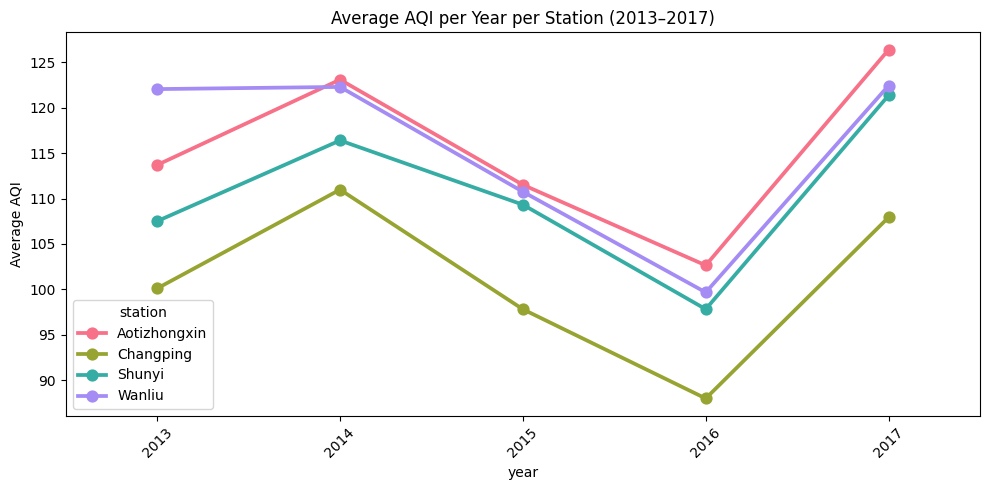

In [86]:
yearly_avg_by_station = df.groupby(['year', 'station'])['AQI'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.pointplot(data=yearly_avg_by_station, x='year', y='AQI', hue='station', palette='husl', linestyles='-')
plt.title('Average AQI per Year per Station (2013–2017)')
plt.ylabel('Average AQI')
plt.xlabel('year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Average Monthly AQI per Year (2013–2017)

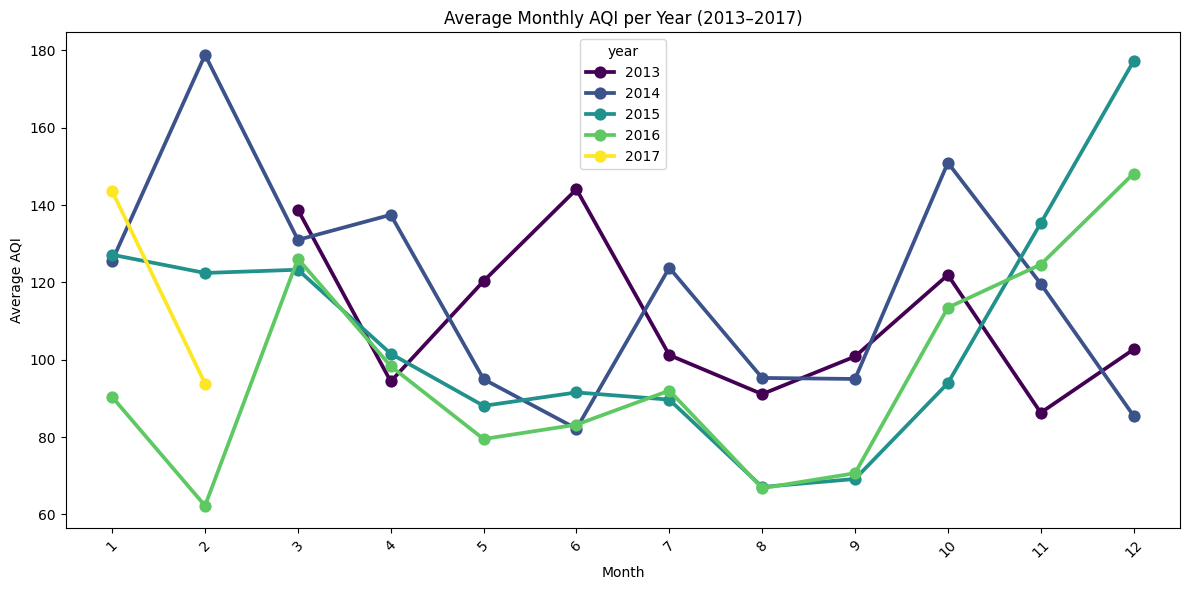

In [87]:
monthly_yearly_avg = df.groupby(['year', 'month'])['AQI'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.pointplot(data=monthly_yearly_avg, x='month', y='AQI', hue='year', palette='viridis', linestyles='-')
plt.title('Average Monthly AQI per Year (2013–2017)')
plt.ylabel('Average AQI')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Yearly Average Pollution Trend

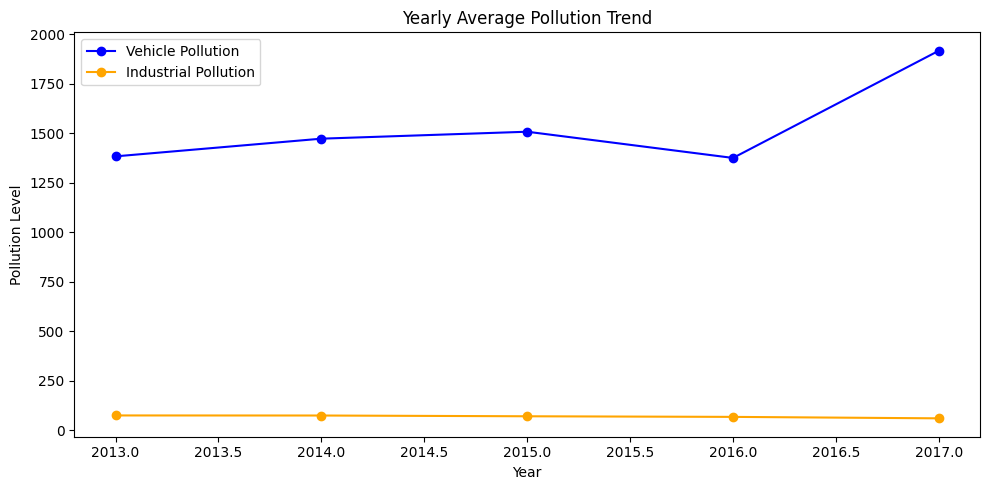

In [88]:
yearly_avg = df.groupby('year')[['vehicle_pollution', 'industrial_pollution']].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(yearly_avg['year'], yearly_avg['vehicle_pollution'], marker='o', label='Vehicle Pollution', color='blue')
plt.plot(yearly_avg['year'], yearly_avg['industrial_pollution'], marker='o', label='Industrial Pollution', color='orange')
plt.title('Yearly Average Pollution Trend')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.legend()
plt.tight_layout()
plt.show()

#### Seasonal Pollution Pattern (Monthly Average)

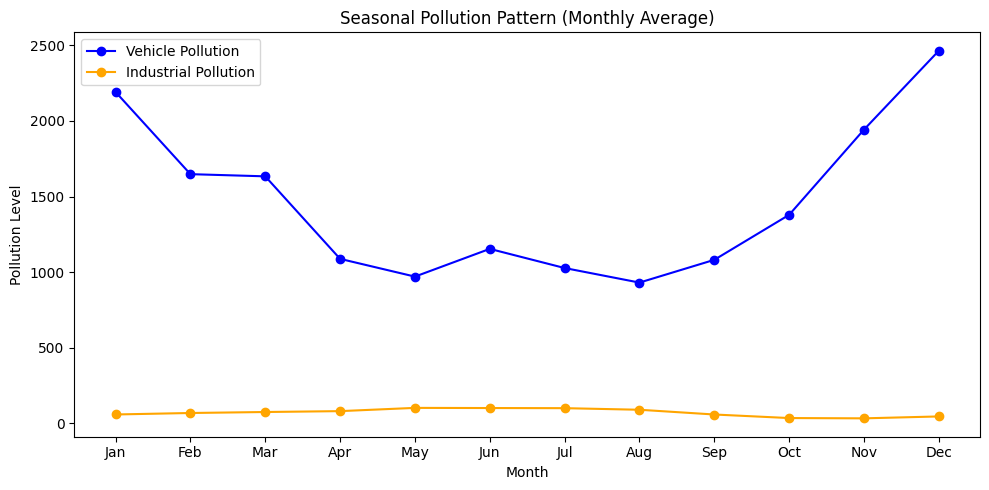

In [89]:
monthly_seasonal = df.groupby('month')[['vehicle_pollution', 'industrial_pollution']].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(monthly_seasonal['month'], monthly_seasonal['vehicle_pollution'], marker='o', label='Vehicle Pollution', color='blue')
plt.plot(monthly_seasonal['month'], monthly_seasonal['industrial_pollution'], marker='o', label='Industrial Pollution', color='orange')
plt.title('Seasonal Pollution Pattern (Monthly Average)')
plt.xlabel('Month')
plt.ylabel('Pollution Level')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()

#### Vehicle vs Industrial Pollution Contribution by Year

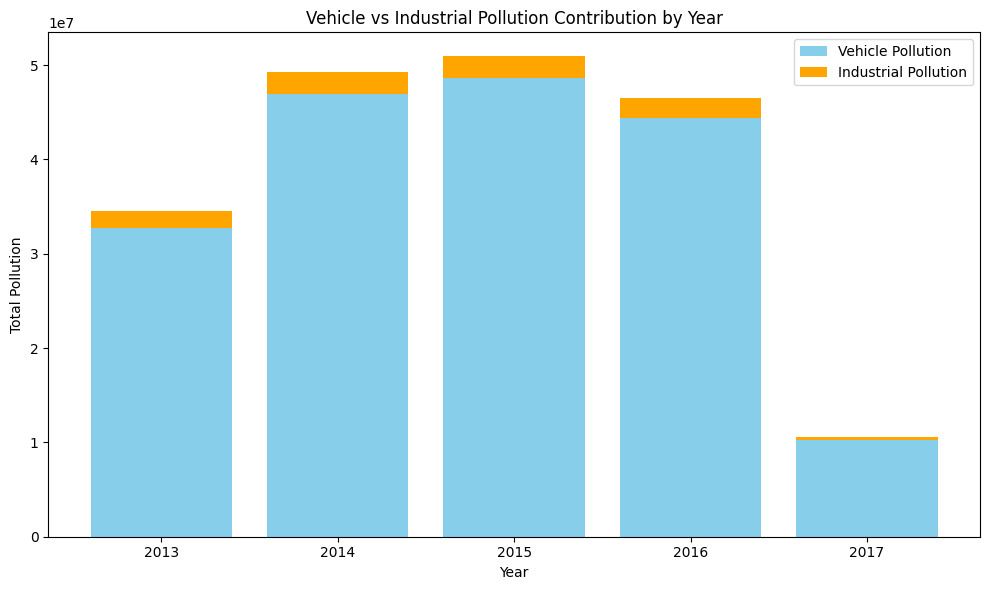

In [91]:
yearly_pollution = df.groupby('year')[['vehicle_pollution', 'industrial_pollution']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(yearly_pollution['year'], yearly_pollution['vehicle_pollution'], label='Vehicle Pollution', color='skyblue')
plt.bar(yearly_pollution['year'], yearly_pollution['industrial_pollution'],
        bottom=yearly_pollution['vehicle_pollution'], label='Industrial Pollution', color='orange')

plt.title('Vehicle vs Industrial Pollution Contribution by Year')
plt.xlabel('Year')
plt.ylabel('Total Pollution')
plt.legend()
plt.tight_layout()
plt.show()

#### Pollution Type Contribution by Station and Year

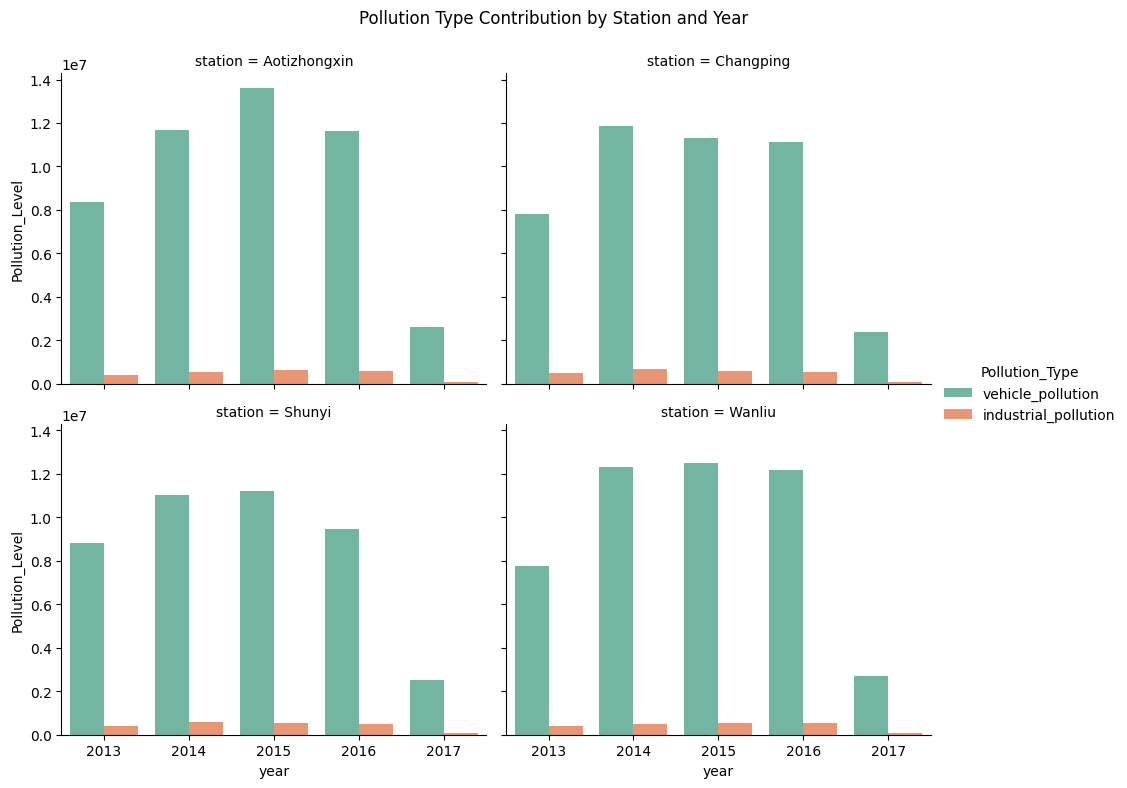

In [92]:
pollution_by_station_year = df.groupby(['station', 'year'])[['vehicle_pollution', 'industrial_pollution']].sum().reset_index()

df_melted = pollution_by_station_year.melt(
    id_vars=['station', 'year'],
    value_vars=['vehicle_pollution', 'industrial_pollution'],
    var_name='Pollution_Type',
    value_name='Pollution_Level'
)

g = sns.catplot(
    data=df_melted,
    x='year', y='Pollution_Level',
    hue='Pollution_Type',
    col='station',
    kind='bar',
    col_wrap=2,
    height=4,
    aspect=1.2,
    palette='Set2'
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Pollution Type Contribution by Station and Year')
plt.show()